In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mind = pd.read_csv('mindwave.csv').drop(columns=['raw', 'attention', 'meditation'])
muse = pd.read_csv('muse.csv').drop(columns=['attention']) / 1.8 * 4096 * 2

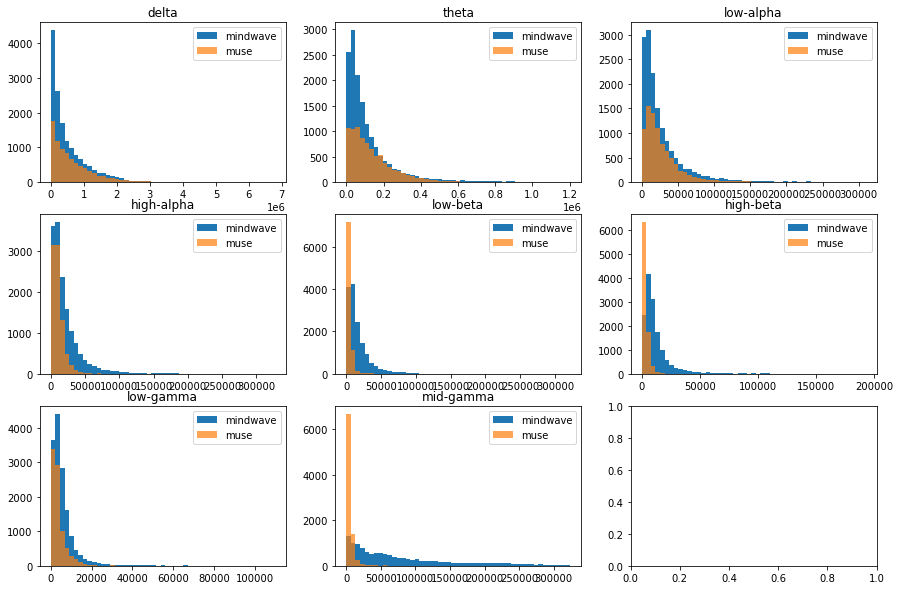

In [3]:
def display_comparison(mind, muse):
    fig, ax = plt.subplots(3, 3, figsize=(15, 10))
    ax = ax.ravel() 
    for idx in range(8):
        m = (max(mind.iloc[:,idx]) + max(muse.iloc[:,idx])) / 8
        bins = np.linspace(0, m, 50)
        ax[idx].hist(mind.iloc[:,idx], bins=bins, alpha=1, label='mindwave')
        ax[idx].hist(muse.iloc[:,idx], bins=bins, alpha=0.7, label='muse')
        ax[idx].set_title(mind.columns[idx])
        ax[idx].legend()

display_comparison(mind, muse)

In [4]:
from scipy.optimize import fmin, minimize
from scipy.stats import normaltest

def _func(c, array): 
    return np.abs(np.std(array ** (1/c)) - 1)

def _calculate_c(array):
    res = fmin(_func, 1, args=(array,), disp=0)
    return res[0]

def get_c_array(df):
    return np.array([_calculate_c(df[col]) for col in df.columns])

def normalize(df):
    return df ** (1/get_c_array(df))

mind_c = get_c_array(mind)

print(get_c_array(mind))
print(get_c_array(muse))

mind_n = normalize(mind)
muse_n = normalize(muse)

print(mind_n.mean())
print(muse_n.mean())

muse = (muse_n - muse_n.mean() + mind_n.mean()) ** mind_c

[7.32900391 6.39179688 5.95166016 5.67324219 5.53769531 5.55654297
 5.14970703 7.08144531]
[7.47392578 6.41220703 5.65654297 5.06787109 4.69228516 4.56396484
 4.8109375  4.92177734]
delta         5.576955
theta         5.832594
low-alpha     5.188705
high-alpha    5.440118
low-beta      5.509398
high-beta     5.261583
low-gamma     5.088524
mid-gamma     4.860328
dtype: float64
delta         5.687801
theta         6.030335
low-alpha     5.819261
high-alpha    6.053460
low-beta      5.892162
high-beta     5.753560
low-gamma     5.302043
mid-gamma     5.343249
dtype: float64


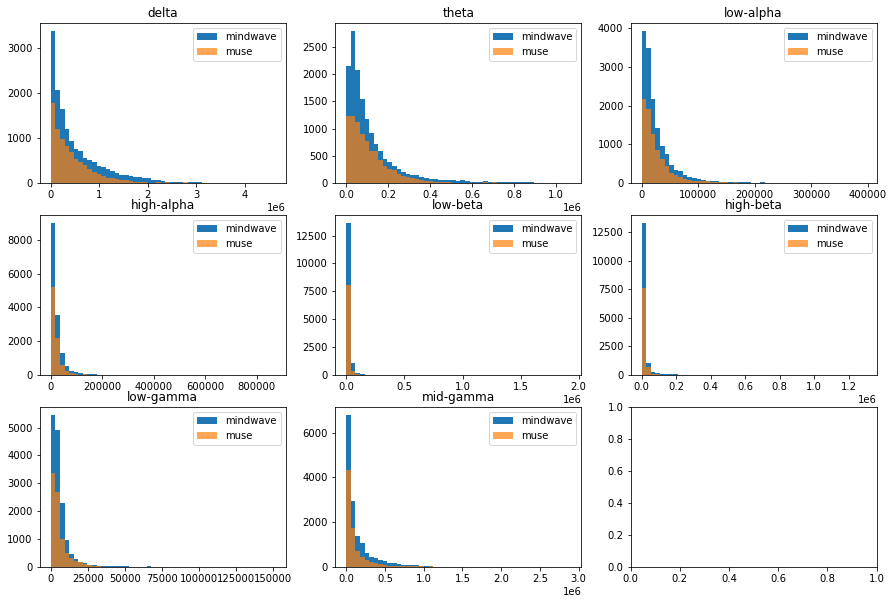

In [5]:
display_comparison(mind, muse)